In [1]:
import numpy as np
import matplotlib.pyplot as plt

# get data
eeg_data = np.genfromtxt("data/reduced.txt", delimiter=" ").astype(np.float32)
eeg_data.shape

(24, 76800)

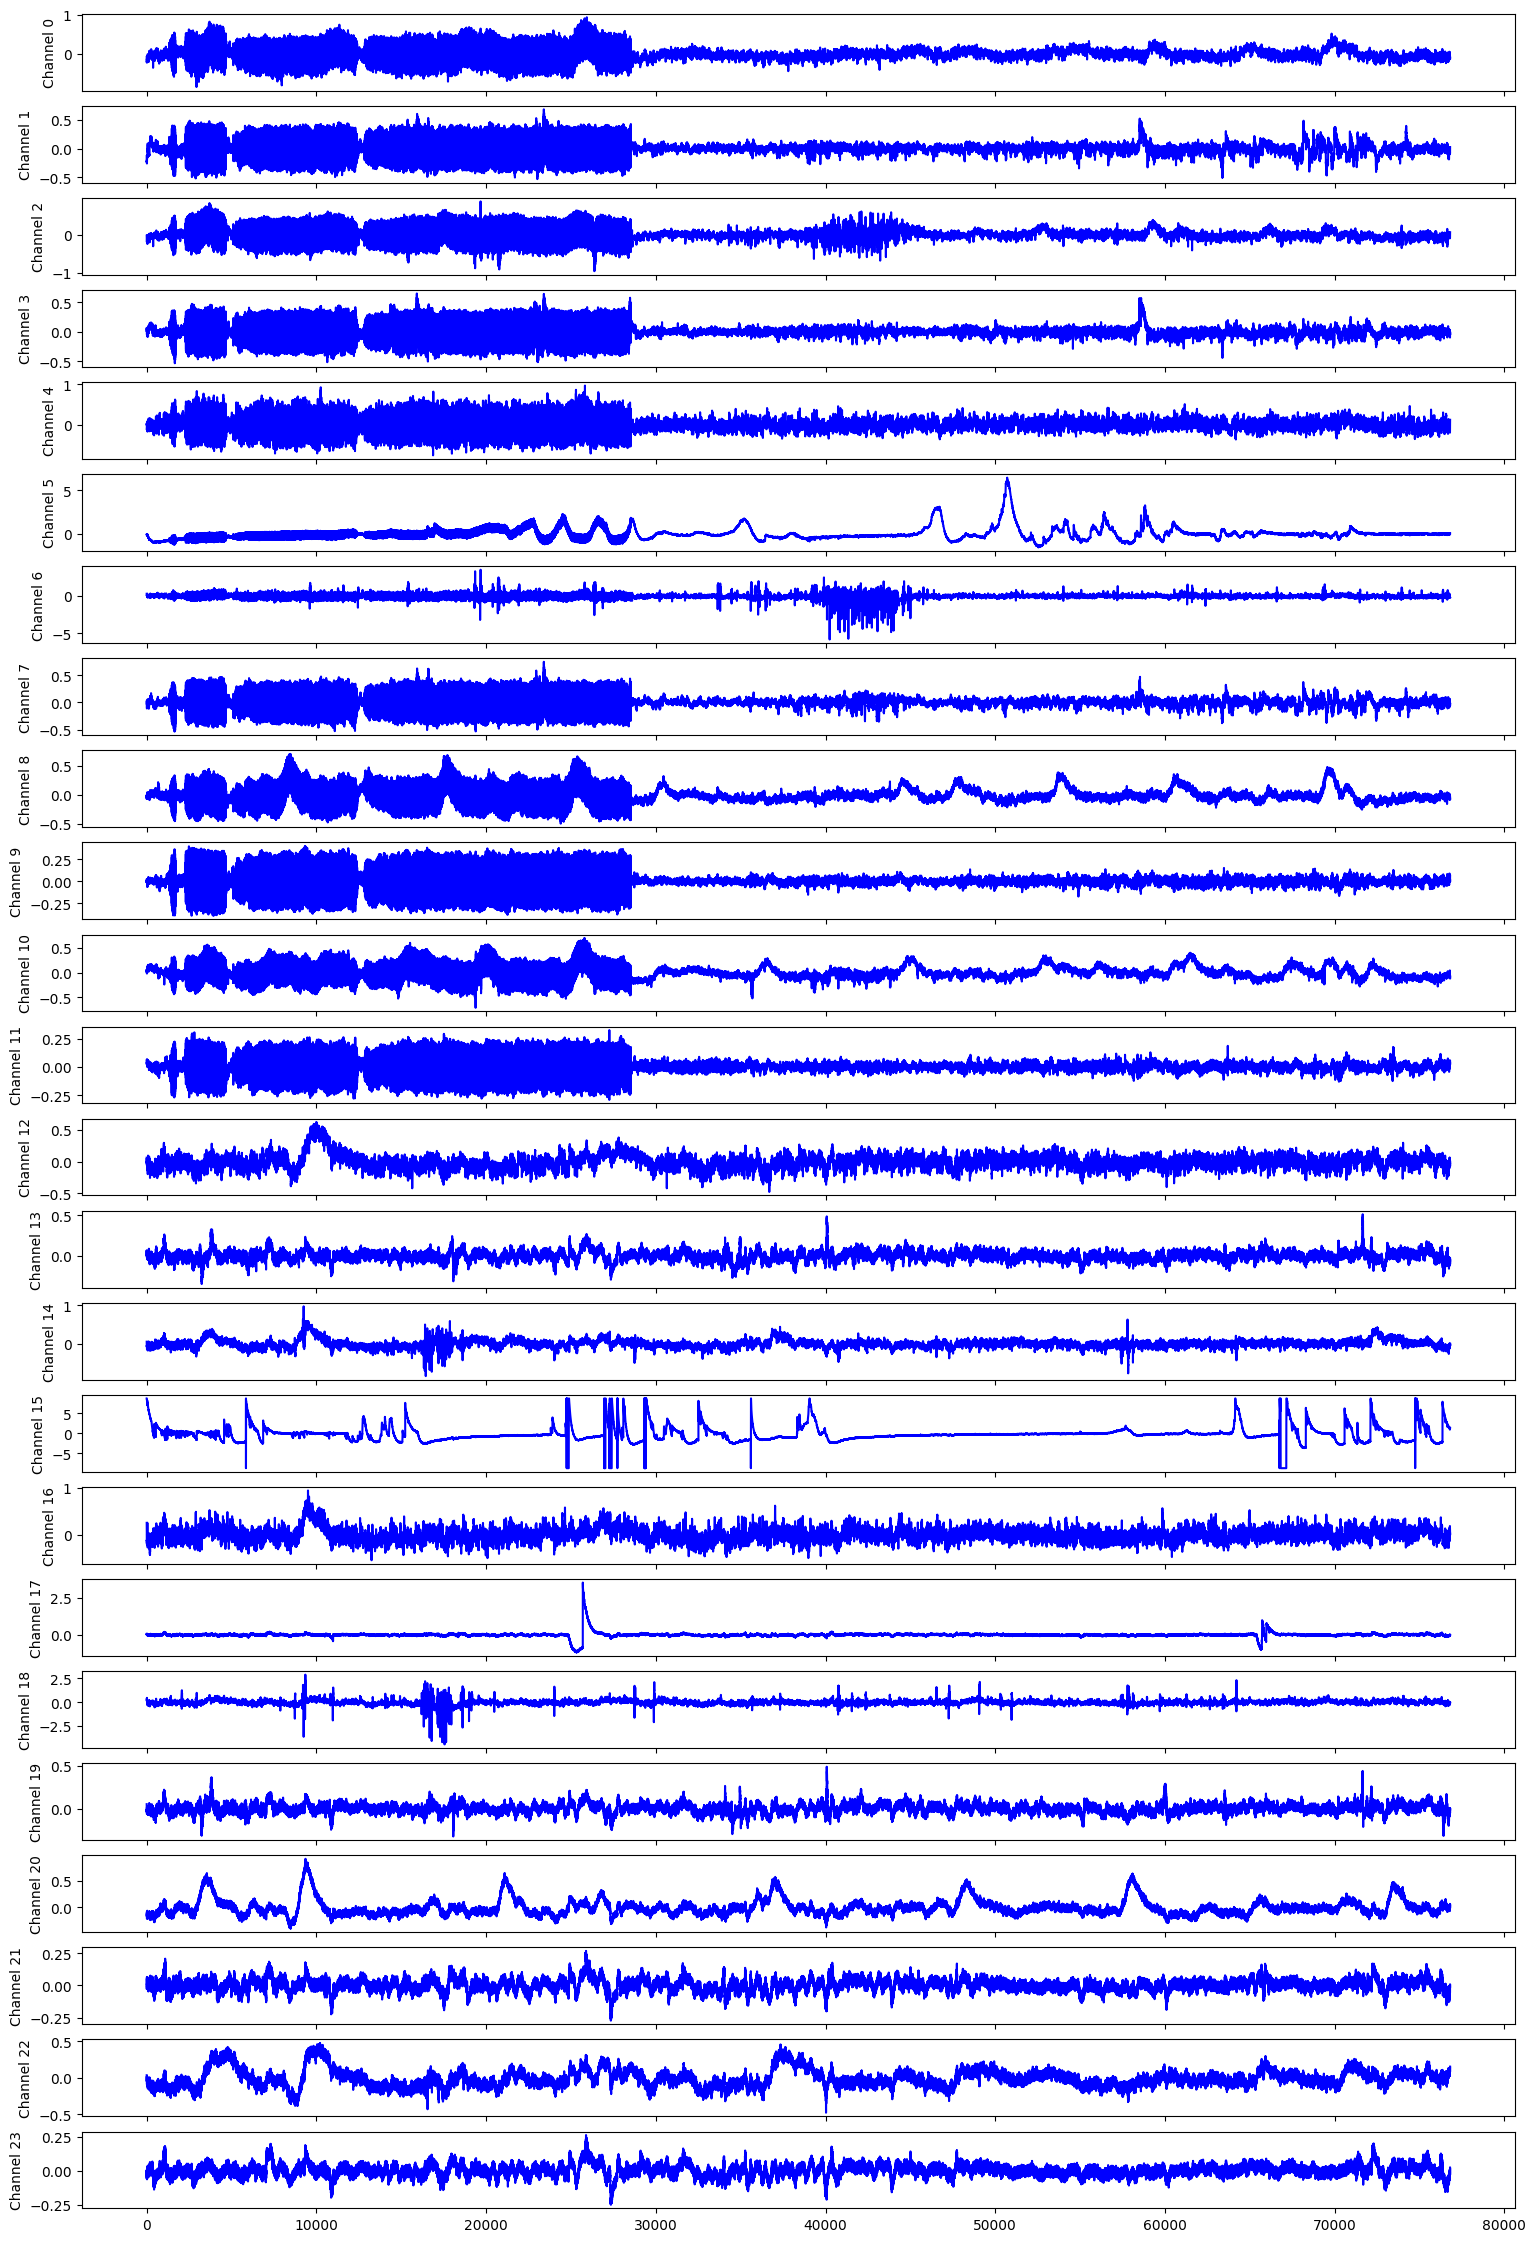

In [2]:
# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 28.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

In [3]:
from importlib import reload
import CPD.benchwarm

reload(CPD.benchwarm)

<module 'CPD.benchwarm' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\benchwarm.py'>

In [4]:
# put arrays in dictionary for labels
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i]

In [5]:
# warm up for 30 seconds and determine best lags
# (runs in 23 mins)
arpwarm = CPD.benchwarm.ARPWarm(channels, n0=30, M=10, chunks=6)
arpwarm.warmup()

channel_1: order AR(107)
channel_1: fitting complete
AIC:-17711.455428941783
Log-Likelihood:8964.727714470891
channel_1: innovations generated
Mean:2.250261173337822e-16
Std-dev:0.021918608424068405

channel_0: order AR(47)
channel_0: fitting complete
AIC:-16852.363924363766
Log-Likelihood:8475.181962181883
channel_0: innovations generated
Mean:-6.702901994177718e-18
Std-dev:0.025903799406815142

channel_2: order AR(26)
channel_2: fitting complete
AIC:-18023.34512251339
Log-Likelihood:9039.672561256695
channel_2: innovations generated
Mean:-5.4899859057237684e-17
Std-dev:0.022616678033373635

channel_3: order AR(114)
channel_3: fitting complete
AIC:-17704.794751446538
Log-Likelihood:8968.397375723269
channel_3: innovations generated
Mean:2.641472655207196e-17
Std-dev:0.02179846288849314

channel_7: order AR(114)
channel_7: fitting complete
AIC:-18483.572672611484
Log-Likelihood:9357.786336305742
channel_7: innovations generated
Mean:-2.6072065124718516e-17
Std-dev:0.019635390263264788


In [6]:
import CPD.benchmark
reload(CPD.benchmark)

<module 'CPD.benchmark' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\benchmark.py'>

In [7]:
cpd = CPD.benchmark.Online(arpwarm, k=10)

In [8]:
change_point = cpd.run()

print(f"change point detected at t={change_point}")

STEP 30
channel_3 reset rejection count 0
channel_7 reset rejection count 0
channel_17 reset rejection count 0
channel_11 reset rejection count 0
channel_13 reset rejection count 0
channel_8 reset rejection count 0
channel_4 reset rejection count 0
channel_9 reset rejection count 0
channel_20 reset rejection count 0
channel_23 reset rejection count 0
channel_0 reset rejection count 0
channel_5 reset rejection count 0
channel_19 rejection incremented 1
channel_6 reset rejection count 0
channel_21 reset rejection count 0
channel_12 reset rejection count 0
channel_14 reset rejection count 0
channel_10 reset rejection count 0
channel_22 reset rejection count 0
channel_1 reset rejection count 0
channel_2 reset rejection count 0
channel_15 reset rejection count 0
channel_16 reset rejection count 0
channel_18 reset rejection count 0
STEP 31
channel_3 reset rejection count 0
channel_7 reset rejection count 0
channel_17 reset rejection count 0
channel_11 reset rejection count 0
channel_13 reset

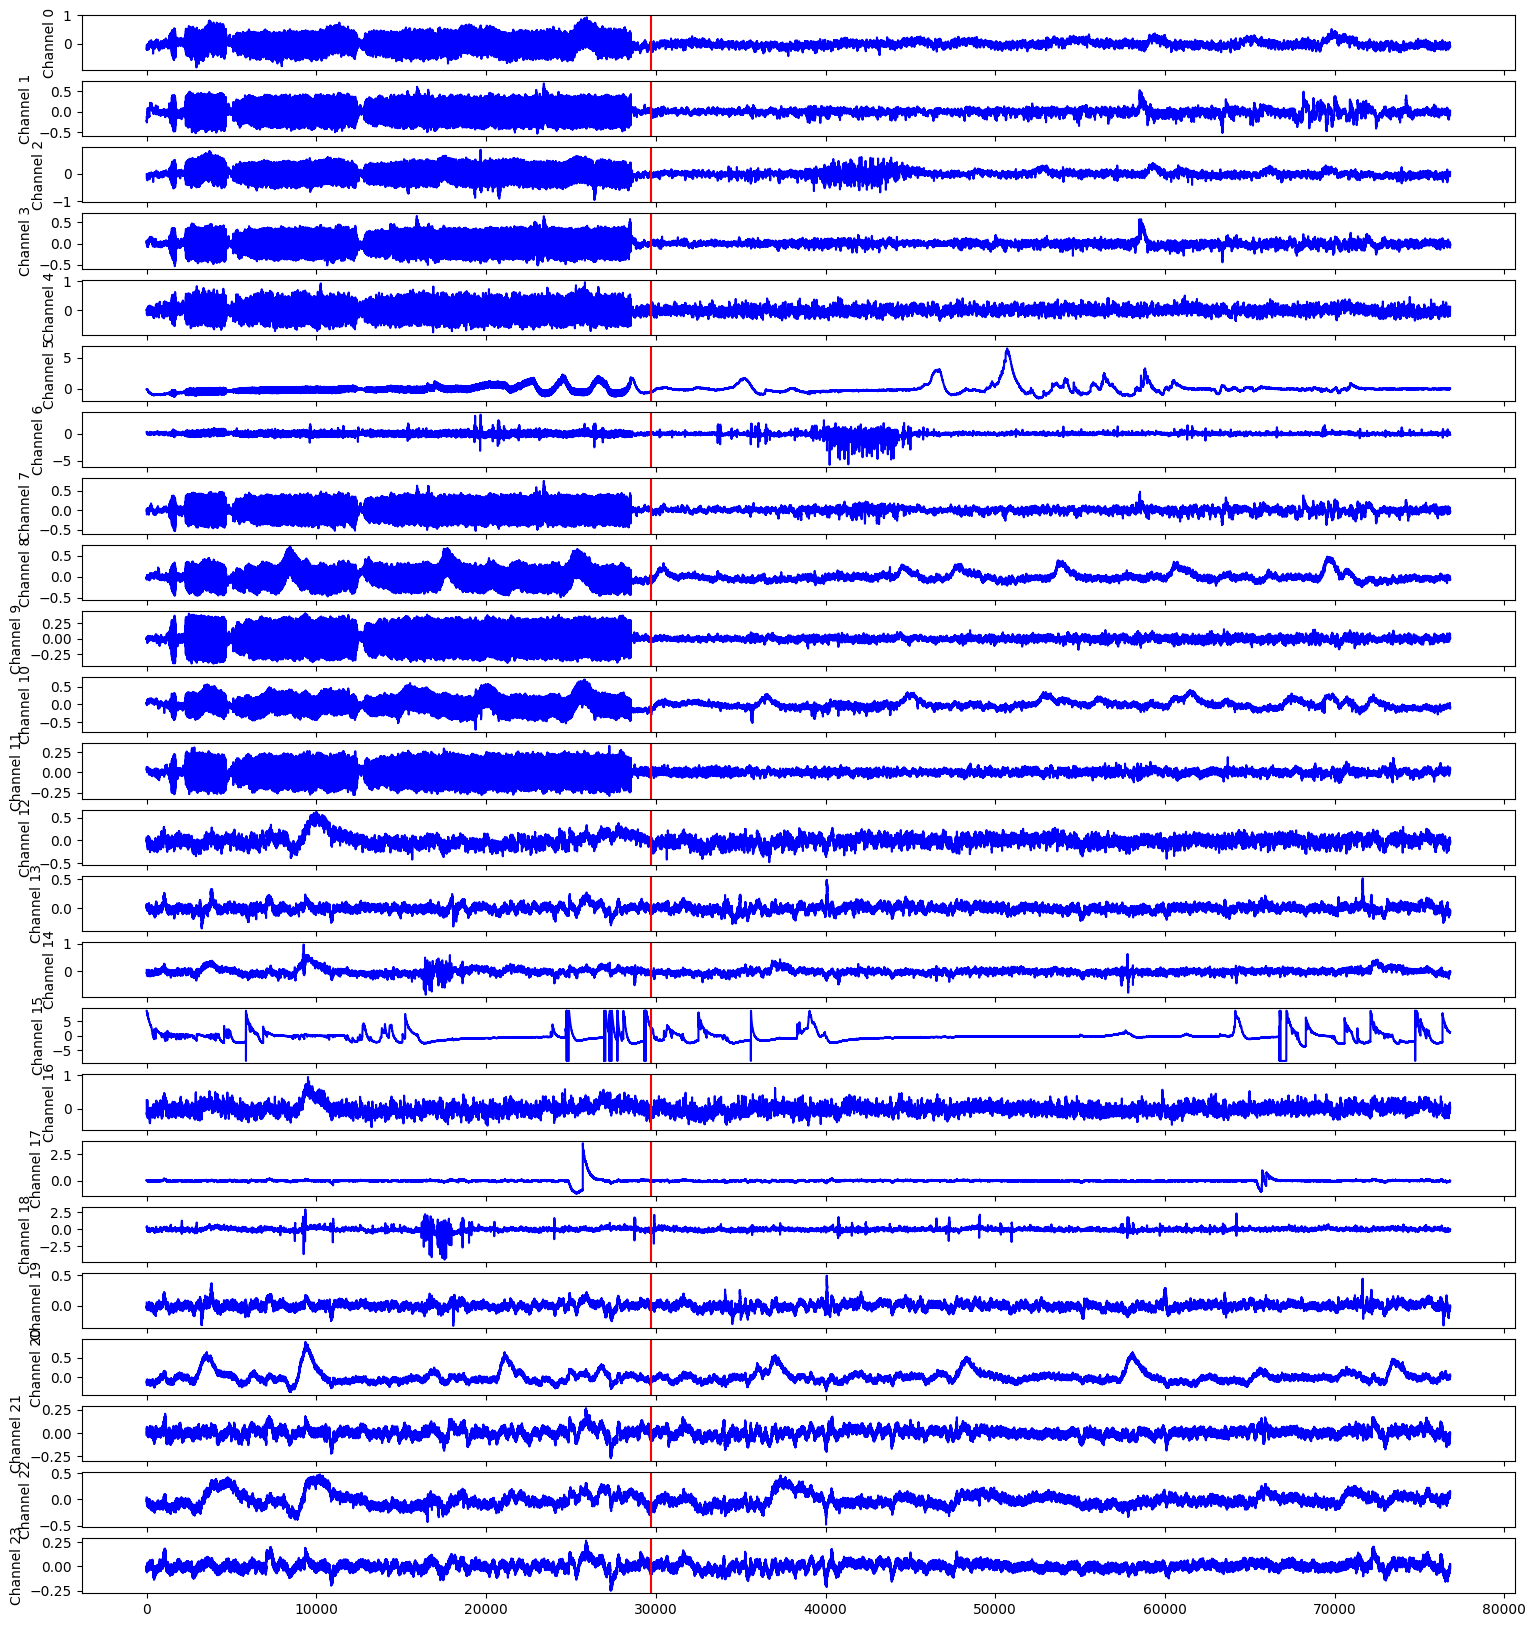

In [9]:
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].axvline(x=change_point, c='r')
    axs[c].set_ylabel(f"Channel {c}")

Utilize the online version of the algorithm to tune your hyperparameters.